In [1]:
import pandas as pd    #用于数据处理和分析，可处理表格数据。
import numpy as np     #用于数值计算，提供了高效的数组操作。
import matplotlib.pyplot as plt    #用于绘制各种类型的图表
import seaborn as sns   #基于matplotlib的高级绘图库，能绘制更美观的统计图形。
import warnings
warnings.filterwarnings("ignore")
 
 # 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统常用黑体字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
data = pd.read_csv('data.csv')    #读取数据
print(data.head())


c:\Anaconda\envs\vs\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0   0       Own Home       482087.0                  NaN        0.0   
1   1       Own Home      1025487.0            10+ years        0.0   
2   2  Home Mortgage       751412.0              8 years        0.0   
3   3       Own Home       805068.0              6 years        0.0   
4   4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0            

In [2]:
# 先筛选字符串变量 
discrete_features = data.select_dtypes(include=['object']).columns.tolist()
# Home Ownership 标签编码
home_ownership_mapping = {
    'Own Home': 1,
    'Rent': 2,
    'Have Mortgage': 3,
    'Home Mortgage': 4
}
data['Home Ownership'] = data['Home Ownership'].map(home_ownership_mapping)

# Years in current job 标签编码
years_in_job_mapping = {
    '< 1 year': 1,
    '1 year': 2,
    '2 years': 3,
    '3 years': 4,
    '4 years': 5,
    '5 years': 6,
    '6 years': 7,
    '7 years': 8,
    '8 years': 9,
    '9 years': 10,
    '10+ years': 11
}
data['Years in current job'] = data['Years in current job'].map(years_in_job_mapping)

# Purpose 独热编码，记得需要将bool类型转换为数值
data = pd.get_dummies(data, columns=['Purpose'])
data2 = pd.read_csv("data.csv") # 重新读取数据，用来做列名对比
list_final = [] # 新建一个空列表，用于存放独热编码后新增的特征名
for i in data.columns:
    if i not in data2.columns:
       list_final.append(i) # 这里打印出来的就是独热编码后的特征名
for i in list_final:
    data[i] = data[i].astype(int) # 这里的i就是独热编码后的特征名



# Term 0 - 1 映射
term_mapping = {
    'Short Term': 0,
    'Long Term': 1
}
data['Term'] = data['Term'].map(term_mapping)
data.rename(columns={'Term': 'Long Term'}, inplace=True) # 重命名列
continuous_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()  #把筛选出来的列名转换成列表
 
 # 连续特征用中位数补全
for feature in continuous_features:     
    mode_value = data[feature].mode()[0]            #获取该列的众数。
    data[feature].fillna(mode_value, inplace=True)          #用众数填充该列的缺失值，inplace=True表示直接在原数据上修改。

# 最开始也说了 很多调参函数自带交叉验证，甚至是必选的参数，你如果想要不交叉反而实现起来会麻烦很多
# 所以这里我们还是只划分一次数据集
from sklearn.model_selection import train_test_split
X = data.drop(['Credit Default'], axis=1)  # 特征，axis=1表示按列删除
y = data['Credit Default'] # 标签
# # 按照8:2划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80%训练集，20%测试集


In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 标准化数据（聚类前通常需要标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k=2, 惯性: 218529.50, 轮廓系数: 0.320, CH 指数: 479.34, DB 指数: 3.222
k=3, 惯性: 207982.87, 轮廓系数: 0.209, CH 指数: 441.88, DB 指数: 2.906
k=4, 惯性: 200477.28, 轮廓系数: 0.220, CH 指数: 399.12, DB 指数: 2.441
k=5, 惯性: 192940.36, 轮廓系数: 0.224, CH 指数: 384.19, DB 指数: 2.042
k=6, 惯性: 185411.81, 轮廓系数: 0.227, CH 指数: 380.64, DB 指数: 1.733
k=7, 惯性: 178444.49, 轮廓系数: 0.130, CH 指数: 378.31, DB 指数: 1.633
k=8, 惯性: 174920.27, 轮廓系数: 0.143, CH 指数: 352.31, DB 指数: 1.817
k=9, 惯性: 167383.96, 轮廓系数: 0.150, CH 指数: 364.27, DB 指数: 1.636
k=10, 惯性: 159824.84, 轮廓系数: 0.156, CH 指数: 378.43, DB 指数: 1.502


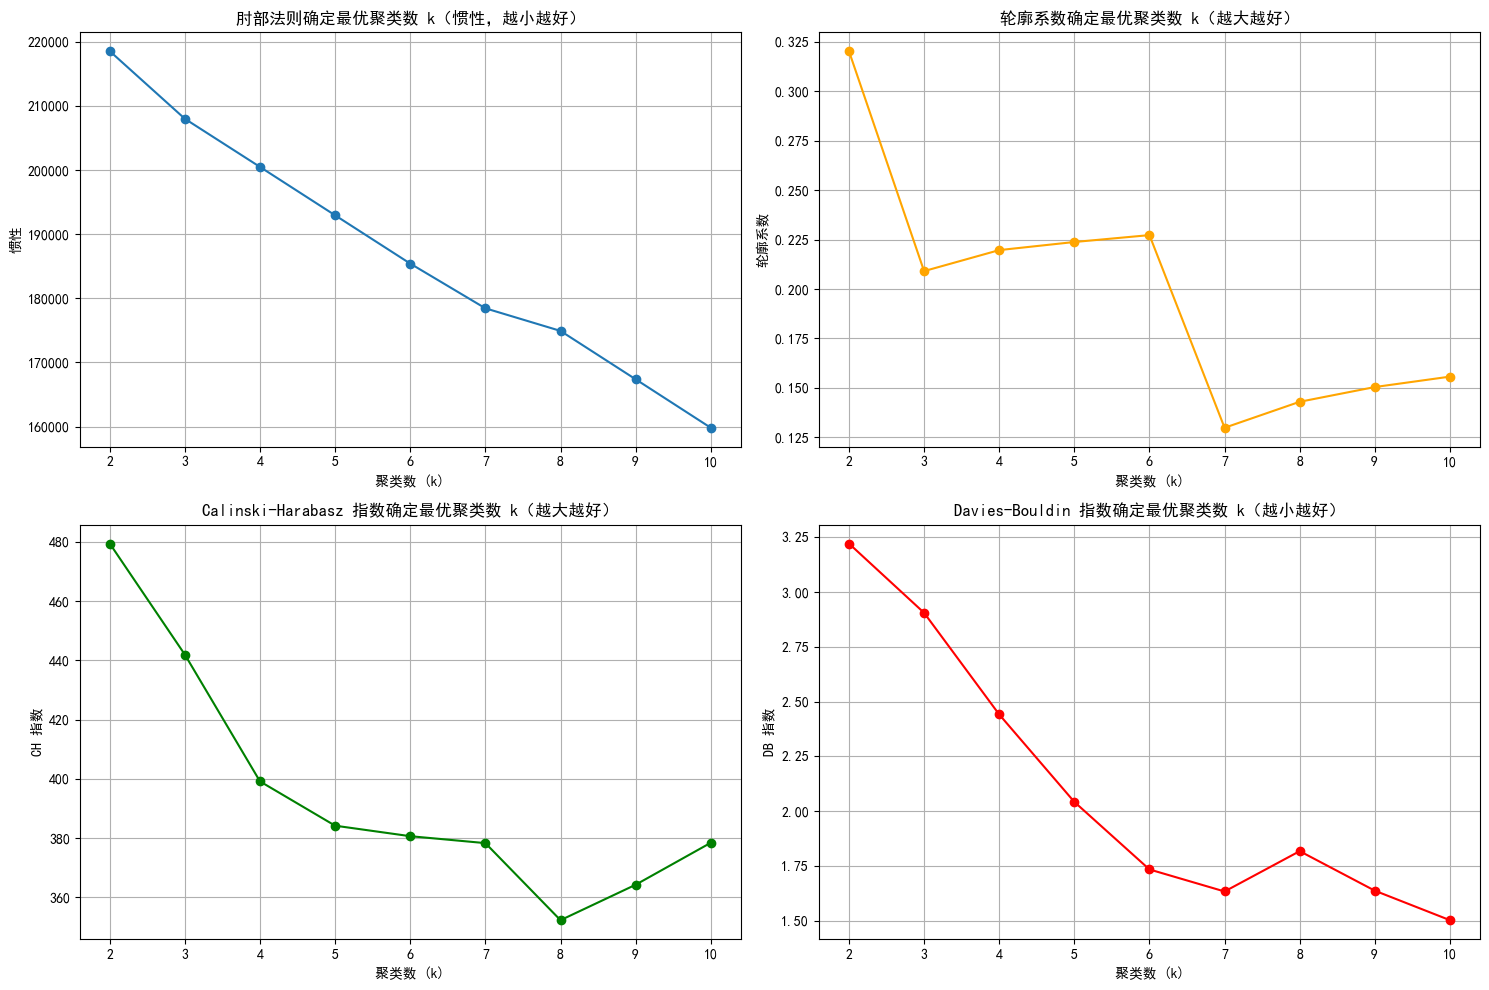

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# 评估不同 k 值下的指标
k_range = range(2, 11)  # 测试 k 从 2 到 10
inertia_values = []
silhouette_scores = []
ch_scores = []
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    inertia_values.append(kmeans.inertia_)  # 惯性（肘部法则）
    silhouette = silhouette_score(X_scaled, kmeans_labels)  # 轮廓系数
    silhouette_scores.append(silhouette)
    ch = calinski_harabasz_score(X_scaled, kmeans_labels)  # CH 指数
    ch_scores.append(ch)
    db = davies_bouldin_score(X_scaled, kmeans_labels)  # DB 指数
    db_scores.append(db)
    print(f"k={k}, 惯性: {kmeans.inertia_:.2f}, 轮廓系数: {silhouette:.3f}, CH 指数: {ch:.2f}, DB 指数: {db:.3f}")

# 绘制评估指标图
plt.figure(figsize=(15, 10))

# 肘部法则图（Inertia）
plt.subplot(2, 2, 1)
plt.plot(k_range, inertia_values, marker='o')
plt.title('肘部法则确定最优聚类数 k（惯性，越小越好）')
plt.xlabel('聚类数 (k)')
plt.ylabel('惯性')
plt.grid(True)

# 轮廓系数图
plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('轮廓系数确定最优聚类数 k（越大越好）')
plt.xlabel('聚类数 (k)')
plt.ylabel('轮廓系数')
plt.grid(True)

# CH 指数图
plt.subplot(2, 2, 3)
plt.plot(k_range, ch_scores, marker='o', color='green')
plt.title('Calinski-Harabasz 指数确定最优聚类数 k（越大越好）')
plt.xlabel('聚类数 (k)')
plt.ylabel('CH 指数')
plt.grid(True)

# DB 指数图
plt.subplot(2, 2, 4)
plt.plot(k_range, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin 指数确定最优聚类数 k（越小越好）')
plt.xlabel('聚类数 (k)')
plt.ylabel('DB 指数')
plt.grid(True)

plt.tight_layout()
plt.show()

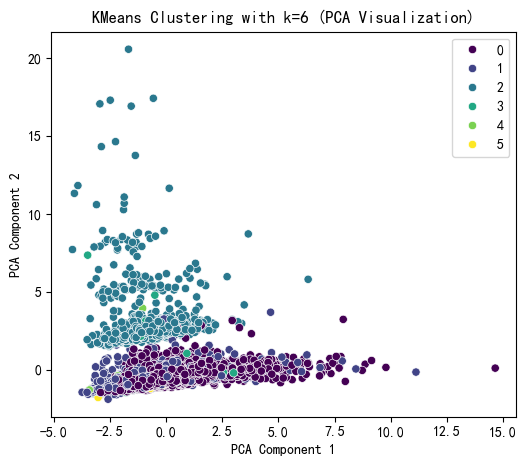

KMeans Cluster labels (k=6) added to X:
KMeans_Cluster
0                 5205
1                 1220
2                  903
3                  128
4                   34
5                   10
dtype: int64


In [5]:
# 提示用户选择 k 值
selected_k = 6

# 使用选择的 k 值进行 KMeans 聚类
kmeans = KMeans(n_clusters=selected_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
X['KMeans_Cluster'] = kmeans_labels

# 使用 PCA 降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 聚类结果可视化
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'KMeans Clustering with k={selected_k} (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 打印 KMeans 聚类标签的前几行
print(f"KMeans Cluster labels (k={selected_k}) added to X:")
print(X[['KMeans_Cluster']].value_counts())

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns



# 评估不同 eps 和 min_samples 下的指标
# eps这个参数表示邻域的半径，min_samples表示一个点被认为是核心点所需的最小样本数。
# min_samples这个参数表示一个核心点所需的最小样本数。

eps_range = np.arange(0.3, 0.8, 0.1)  # 测试 eps 从 0.3 到 0.7
min_samples_range = range(3, 8)  # 测试 min_samples 从 3 到 7
results = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        # 计算簇的数量（排除噪声点 -1）
        n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        # 计算噪声点数量
        n_noise = list(dbscan_labels).count(-1)
        # 只有当簇数量大于 1 且有有效簇时才计算评估指标
        if n_clusters > 1:
            # 排除噪声点后计算评估指标
            mask = dbscan_labels != -1
            if mask.sum() > 0:  # 确保有非噪声点
                silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
                ch = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
                db = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
                results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'silhouette': silhouette,
                    'ch_score': ch,
                    'db_score': db
                })
                print(f"eps={eps:.1f}, min_samples={min_samples}, 簇数: {n_clusters}, 噪声点: {n_noise}, "
                      f"轮廓系数: {silhouette:.3f}, CH 指数: {ch:.2f}, DB 指数: {db:.3f}")
        else:
            print(f"eps={eps:.1f}, min_samples={min_samples}, 簇数: {n_clusters}, 噪声点: {n_noise}, 无法计算评估指标")

# 将结果转为 DataFrame 以便可视化和选择参数
results_df = pd.DataFrame(results)

eps=0.3, min_samples=3, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.3, min_samples=4, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.3, min_samples=5, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.3, min_samples=6, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.3, min_samples=7, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.4, min_samples=3, 簇数: 1, 噪声点: 7497, 无法计算评估指标
eps=0.4, min_samples=4, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.4, min_samples=5, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.4, min_samples=6, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.4, min_samples=7, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.5, min_samples=3, 簇数: 21, 噪声点: 7420, 轮廓系数: 0.494, CH 指数: 89.64, DB 指数: 0.613
eps=0.5, min_samples=4, 簇数: 5, 噪声点: 7473, 轮廓系数: 0.463, CH 指数: 83.11, DB 指数: 0.749
eps=0.5, min_samples=5, 簇数: 1, 噪声点: 7495, 无法计算评估指标
eps=0.5, min_samples=6, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.5, min_samples=7, 簇数: 0, 噪声点: 7500, 无法计算评估指标
eps=0.6, min_samples=3, 簇数: 56, 噪声点: 7214, 轮廓系数: 0.267, CH 指数: 58.95, DB 指数: 0.953
eps=0.6, min_samples=4, 簇数: 21, 噪声点: 7356, 轮廓系数: 0.306, CH 指数: 72.52, DB 指数: 0.988
eps=0.

In [7]:
results_df

,eps,min_samples,n_clusters,n_noise,silhouette,ch_score,db_score
0,0.5,3,21,7420,0.493932,89.643271,0.612520
1,0.5,4,5,7473,0.463183,83.112261,0.748730
2,0.6,3,56,7214,0.267180,58.953185,0.952780
3,0.6,4,21,7356,0.306341,72.516588,0.987645
4,0.6,5,7,7433,0.346922,42.556437,0.988006
5,0.6,6,6,7452,0.414377,48.321691,0.842974
6,0.6,7,2,7486,0.757909,109.895595,0.317504
7,0.7,3,90,6800,0.028382,22.652187,0.917994
8,0.7,4,39,7047,-0.026360,20.195762,0.954573
9,0.7,5,15,7214,-0.013375,26.353848,1.010414


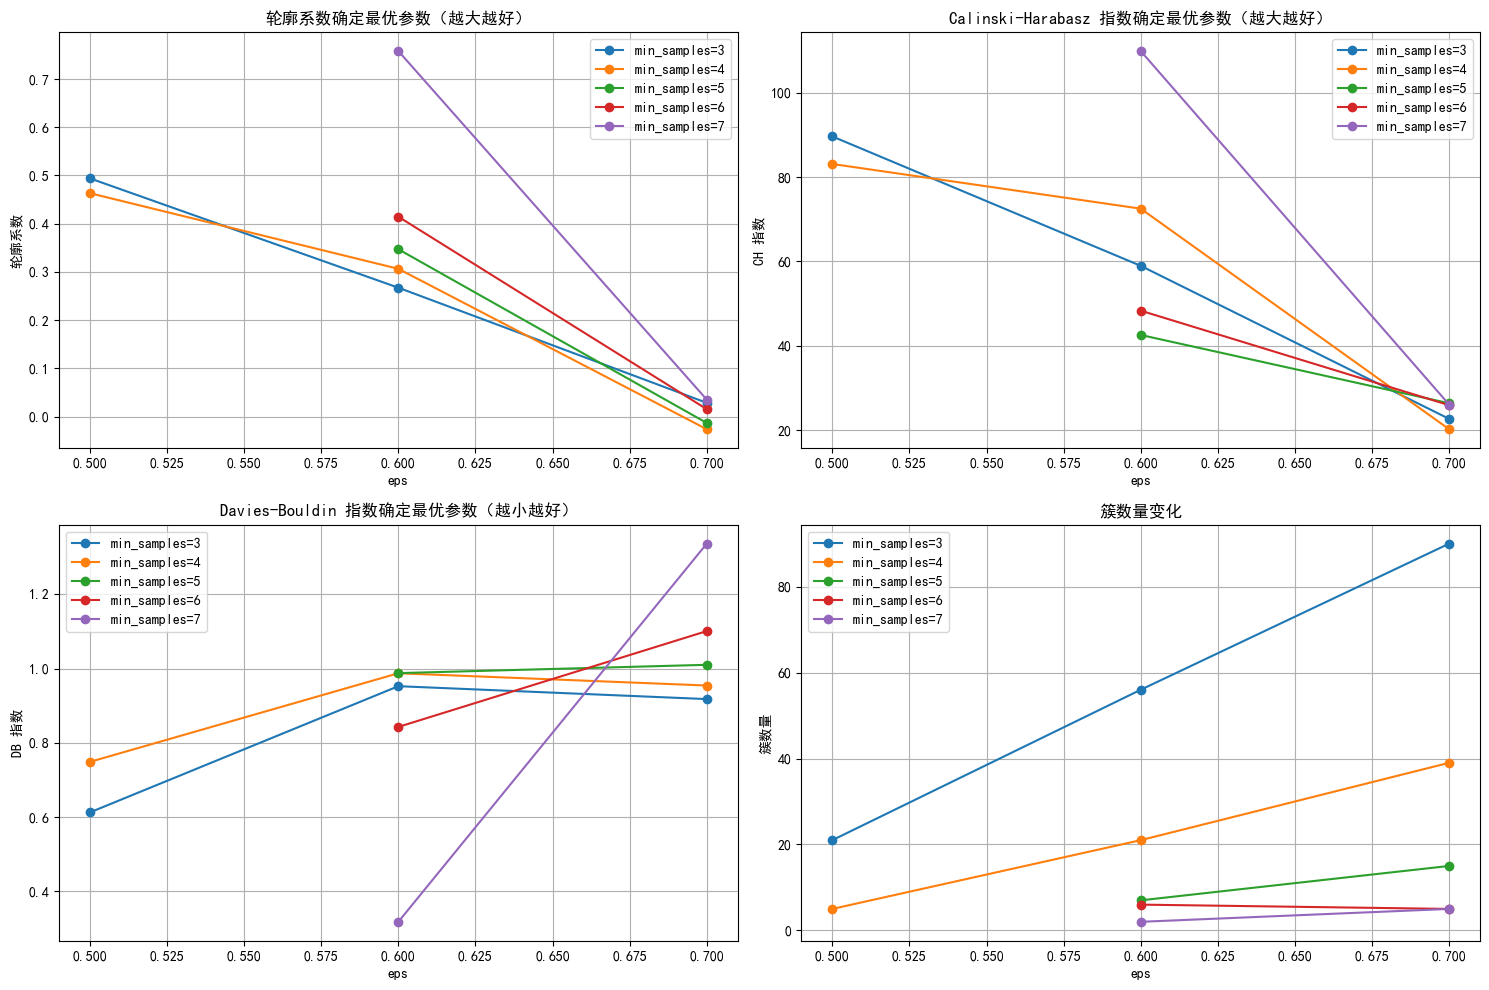

In [8]:
# 绘制评估指标图，增加点论文中的工作量
plt.figure(figsize=(15, 10))
# 轮廓系数图
plt.subplot(2, 2, 1)
for min_samples in min_samples_range:
    subset = results_df[results_df['min_samples'] == min_samples] # 
    plt.plot(subset['eps'], subset['silhouette'], marker='o', label=f'min_samples={min_samples}')
plt.title('轮廓系数确定最优参数（越大越好）')
plt.xlabel('eps')
plt.ylabel('轮廓系数')
plt.legend()
plt.grid(True)

# CH 指数图
plt.subplot(2, 2, 2)
for min_samples in min_samples_range:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['ch_score'], marker='o', label=f'min_samples={min_samples}')
plt.title('Calinski-Harabasz 指数确定最优参数（越大越好）')
plt.xlabel('eps')
plt.ylabel('CH 指数')
plt.legend()
plt.grid(True)

# DB 指数图
plt.subplot(2, 2, 3)
for min_samples in min_samples_range:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['db_score'], marker='o', label=f'min_samples={min_samples}')
plt.title('Davies-Bouldin 指数确定最优参数（越小越好）')
plt.xlabel('eps')
plt.ylabel('DB 指数')
plt.legend()
plt.grid(True)

# 簇数量图
plt.subplot(2, 2, 4)
for min_samples in min_samples_range:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['n_clusters'], marker='o', label=f'min_samples={min_samples}')
plt.title('簇数量变化')
plt.xlabel('eps')
plt.ylabel('簇数量')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

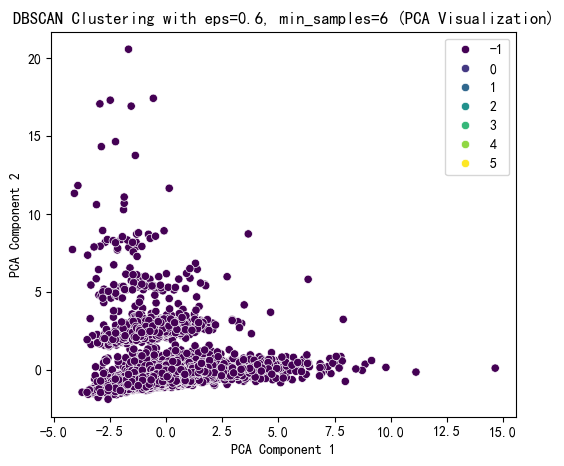

DBSCAN Cluster labels (eps=0.6, min_samples=6) added to X:
DBSCAN_Cluster
-1                7452
 0                  12
 2                   9
 3                   8
 4                   7
 1                   6
 5                   6
dtype: int64


In [9]:
# 选择 eps 和 min_samples 值（根据图表选择最佳参数）
selected_eps = 0.6  # 根据图表调整
selected_min_samples = 6  # 根据图表调整

# 使用选择的参数进行 DBSCAN 聚类
dbscan = DBSCAN(eps=selected_eps, min_samples=selected_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)
X['DBSCAN_Cluster'] = dbscan_labels

# 使用 PCA 降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DBSCAN 聚类结果可视化
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis')
plt.title(f'DBSCAN Clustering with eps={selected_eps}, min_samples={selected_min_samples} (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 打印 DBSCAN 聚类标签的分布
print(f"DBSCAN Cluster labels (eps={selected_eps}, min_samples={selected_min_samples}) added to X:")
print(X[['DBSCAN_Cluster']].value_counts())

n_clusters=2, 轮廓系数: 0.256, CH 指数: 579.09, DB 指数: 3.037
n_clusters=3, 轮廓系数: 0.210, CH 指数: 508.05, DB 指数: 2.699
n_clusters=4, 轮廓系数: 0.222, CH 指数: 456.16, DB 指数: 2.423
n_clusters=5, 轮廓系数: 0.244, CH 指数: 430.89, DB 指数: 2.291
n_clusters=6, 轮廓系数: 0.252, CH 指数: 417.20, DB 指数: 2.011
n_clusters=7, 轮廓系数: 0.263, CH 指数: 412.97, DB 指数: 1.798
n_clusters=8, 轮廓系数: 0.265, CH 指数: 414.19, DB 指数: 1.538
n_clusters=9, 轮廓系数: 0.269, CH 指数: 419.75, DB 指数: 1.372
n_clusters=10, 轮廓系数: 0.277, CH 指数: 428.73, DB 指数: 1.342


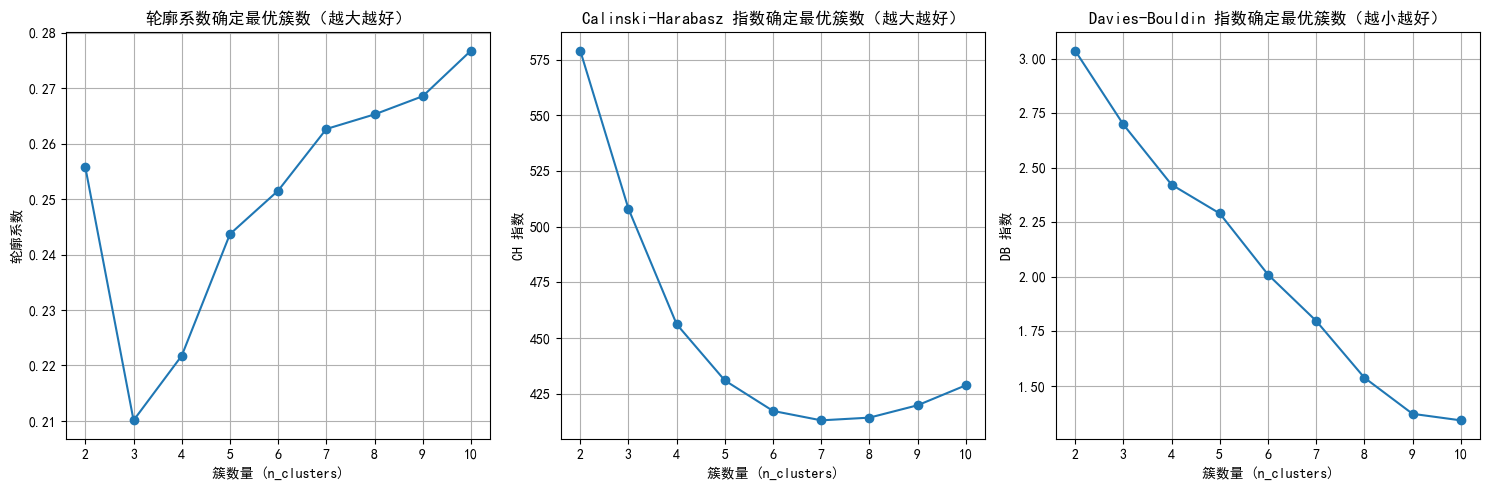

In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 评估不同 n_clusters 下的指标
n_clusters_range = range(2, 11)  # 测试簇数量从 2 到 10
silhouette_scores = []
ch_scores = []
db_scores = []

for n_clusters in n_clusters_range:
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # 使用 Ward 准则合并簇
    agglo_labels = agglo.fit_predict(X_scaled)
    
    # 计算评估指标
    silhouette = silhouette_score(X_scaled, agglo_labels)
    ch = calinski_harabasz_score(X_scaled, agglo_labels)
    db = davies_bouldin_score(X_scaled, agglo_labels)
    
    silhouette_scores.append(silhouette)
    ch_scores.append(ch)
    db_scores.append(db)
    
    print(f"n_clusters={n_clusters}, 轮廓系数: {silhouette:.3f}, CH 指数: {ch:.2f}, DB 指数: {db:.3f}")

# 绘制评估指标图
plt.figure(figsize=(15, 5))

# 轮廓系数图
plt.subplot(1, 3, 1)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('轮廓系数确定最优簇数（越大越好）')
plt.xlabel('簇数量 (n_clusters)')
plt.ylabel('轮廓系数')
plt.grid(True)

# CH 指数图
plt.subplot(1, 3, 2)
plt.plot(n_clusters_range, ch_scores, marker='o')
plt.title('Calinski-Harabasz 指数确定最优簇数（越大越好）')
plt.xlabel('簇数量 (n_clusters)')
plt.ylabel('CH 指数')
plt.grid(True)

# DB 指数图
plt.subplot(1, 3, 3)
plt.plot(n_clusters_range, db_scores, marker='o')
plt.title('Davies-Bouldin 指数确定最优簇数（越小越好）')
plt.xlabel('簇数量 (n_clusters)')
plt.ylabel('DB 指数')
plt.grid(True)

plt.tight_layout()
plt.show()

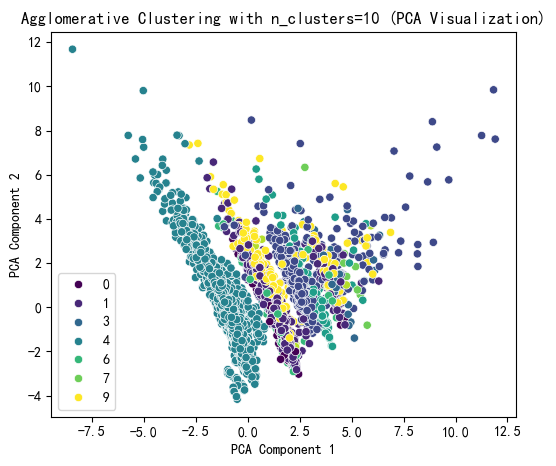

Agglomerative Cluster labels (n_clusters=10) added to X:
Agglo_Cluster
4                5230
1                 778
2                 771
9                 409
5                 127
6                  96
0                  37
3                  34
7                  10
8                   8
dtype: int64


In [11]:
# 提示用户选择 n_clusters 值（这里可以根据图表选择最佳簇数）
selected_n_clusters = 10  # 示例值，根据图表调整

# 使用选择的簇数进行 Agglomerative Clustering 聚类
agglo = AgglomerativeClustering(n_clusters=selected_n_clusters, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)
X['Agglo_Cluster'] = agglo_labels

# 使用 PCA 降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agglomerative Clustering 聚类结果可视化
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette='viridis')
plt.title(f'Agglomerative Clustering with n_clusters={selected_n_clusters} (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 打印 Agglomerative Clustering 聚类标签的分布
print(f"Agglomerative Cluster labels (n_clusters={selected_n_clusters}) added to X:")
print(X[['Agglo_Cluster']].value_counts())

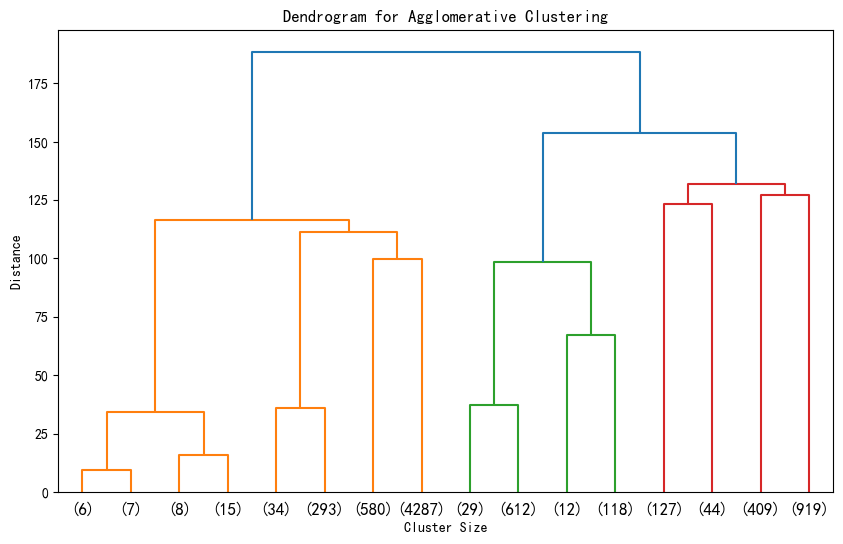

In [12]:
# 层次聚类的树状图可视化
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# 假设 X_scaled 是标准化后的数据
# 计算层次聚类的链接矩阵
Z = hierarchy.linkage(X_scaled, method='ward')  # 'ward' 是常用的合并准则

# 绘制树状图
plt.figure(figsize=(10, 6))
hierarchy.dendrogram(Z, truncate_mode='level', p=3)  # p 控制显示的层次深度
# hierarchy.dendrogram(Z, truncate_mode='level')  # 不用p这个参数，可以显示全部的深度
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()